# Final Project - German Bank Loan

# Description
## Objectives

The objective of the final project will be to build a fully reproducible project that uses ML to address a question of your choice (e.g. in academic or industry).The dataset required for this project is provided along with this document (see details below). This is an individual project. Since this course is an advanced undergraduate/graduate student level course, it is expected that the final report should be publishable and fully reproducible.

The deliverable of this project is a folder with all the following components:

- A README file (text file) to briefly introduce the project idea and how it is organized.
- Well documented Python code to read, explore, and clean data; all processes should be automated and no hand edit on raw data
- Well documented Python code to manipulate, wrangle, visualize data
- Well documented Python code to run ML models and make publication-worthy figures or tables
- Final report should be submitted in PDF. This file should be structured with - Introduction, Methods and Materials, Results, Discussion, and Conclusions (see below).
- We should be able to reproduce your workflow and regenerate your final report.

## Dataset

# Domain: Banking

**Context** : This data set contains historical data of the customers who have taken loans from a German bank and the bank is facing issues with loan defaulters. The bank intends to build a machine learning model to predict whether the customer will default or not based on historical data

**Dataset** - German_bank.csv

**Data Description:** The bank has historical information on relevant features for each customer such as employment duration, existing loans count, saving balance, percentage of income, age, default status.

The data set has 17 columns and 1000 rows. Columns are described below and each row is a customer.

- checking_balance - Amount of money available in account of customers
- months_loan_duration - Duration since loan taken
- credit_history - credit history of each customers
- purpose - Purpose why loan has been taken
- amount - Amount of loan taken
- savings_balance - Balance in account
- employment_duration - Duration of employment
- percent_of_income - Percentage of monthly income
- years_at_residence - Duration of current residence
- age - Age of customer
- other_credit - Any other credits taken
- housing- Type of housing, rent or own
- existing_loans_count - Existing count of loans
- job - Job type
- dependents - Any dependents on customer
- phone - Having phone or not
- default - Default status (Target column)

## 1. Read and explore data.


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.0 MB/s eta 0:00:00


In [ ]:
# import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
# To help with model building
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from IPython.display import display, HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the dataset

url = '/content/drive/MyDrive/AIML/credit.csv'
data = pd.read_csv(url)

In [ ]:
data

checking_balance  months_loan_duration credit_history  \
0             < 0 DM                     6       critical   
1         1 - 200 DM                    48           good   
2            unknown                    12       critical   
3             < 0 DM                    42           good   
4             < 0 DM                    24           poor   
..               ...                   ...            ...   
995          unknown                    12           good   
996           < 0 DM                    30           good   
997          unknown                    12           good   
998           < 0 DM                    45           good   
999       1 - 200 DM                    45       critical   

                  purpose  amount savings_balance employment_duration  \
0    furniture/appliances    1169         unknown           > 7 years   
1    furniture/appliances    5951        < 100 DM         1 - 4 years   
2               education    2096        < 100 DM         4 - 7 years   
3    furniture/appliances    7882        < 100 DM         4 - 7 years   
4                     car    4870        < 100 DM         1 - 4 years   
..                    ...     ...             ...                 ...   
995  furniture/appliances    1736        < 100 DM         4 - 7 years   
996                   car    3857        < 100 DM         1 - 4 years   
997  furniture/appliances     804        < 100 DM           > 7 years   
998  furniture/appliances    1845        < 100 DM         1 - 4 years   
999                   car    4576    100 - 500 DM          unemployed   

     percent_of_income  years_at_residence  age other_credit housing  \
0                    4                   4   67         none     own   
1                    2                   2   22         none     own   
2                    2                   3   49         none     own   
3                    2                   4   45         none   other   
4                    3                   4   53         none   other   
..                 ...                 ...  ...          ...     ...   
995                  3                   4   31         none     own   
996                  4                   4   40         none     own   
997                  4                   4   38         none     own   
998                  4                   4   23         none   other   
999                  3                   4   27         none     own   

     existing_loans_count         job  dependents phone default  
0                       2     skilled           1   yes      no  
1                       1     skilled           1    no     yes  
2                       1   unskilled           2    no      no  
3                       1     skilled           2    no      no  
4                       2     skilled           2    no     yes  
..                    ...         ...         ...   ...     ...  
995                     1   unskilled           1    no      no  
996                     1  management           1   yes      no  
997                     1     skilled           1    no      no  
998                     1     skilled           1   yes     yes  
999                     1     skilled           1    no      no  

[1000 rows x 17 columns]

In [ ]:
data.shape

(1000, 17)

In [ ]:
data.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
data.describe().T

count      mean          std    min     25%     50%  \
months_loan_duration  1000.0    20.903    12.058814    4.0    12.0    18.0   
amount                1000.0  3271.258  2822.736876  250.0  1365.5  2319.5   
percent_of_income     1000.0     2.973     1.118715    1.0     2.0     3.0   
years_at_residence    1000.0     2.845     1.103718    1.0     2.0     3.0   
age                   1000.0    35.546    11.375469   19.0    27.0    33.0   
existing_loans_count  1000.0     1.407     0.577654    1.0     1.0     1.0   
dependents            1000.0     1.155     0.362086    1.0     1.0     1.0   

                          75%      max  
months_loan_duration    24.00     72.0  
amount                3972.25  18424.0  
percent_of_income        4.00      4.0  
years_at_residence       4.00      4.0  
age                     42.00     75.0  
existing_loans_count     2.00      4.0  
dependents               1.00      2.0

## 2. Clean and manipulate data.

In [ ]:
# Checking for missing values
print(data.isnull().sum())

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64


In [ ]:
# Looping through each column to print unique values

categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}\n")

Unique values in checking_balance: ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']

Unique values in credit_history: ['critical' 'good' 'poor' 'perfect' 'very good']

Unique values in purpose: ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']

Unique values in savings_balance: ['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']

Unique values in employment_duration: ['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']

Unique values in other_credit: ['none' 'bank' 'store']

Unique values in housing: ['own' 'other' 'rent']

Unique values in job: ['skilled' 'unskilled' 'management' 'unemployed']

Unique values in phone: ['yes' 'no']

Unique values in default: ['no' 'yes']



In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [ ]:
for column in categorical_columns:
    count_values = data[column].value_counts()
    print(f"Count of each Values in {column}:\n{count_values}\n")

Count of each Values in checking_balance:
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

Count of each Values in credit_history:
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

Count of each Values in purpose:
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

Count of each Values in savings_balance:
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

Count of each Values in employment_duration:
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

Count of each Values in other_credit:
none     814
bank     139
store     47
Name: other_cred

In [ ]:
#Due to a typo, car0 is being replaced with car
data['purpose'] = np.where(data['purpose']=='car0','car',data['purpose'])

In [ ]:
data.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [ ]:
for column in categorical_columns:
    count_values = data[column].value_counts()
    print(f"Count of each Values in {column}:\n{count_values}\n")

Count of each Values in checking_balance:
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

Count of each Values in credit_history:
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

Count of each Values in purpose:
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64

Count of each Values in savings_balance:
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

Count of each Values in employment_duration:
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

Count of each Values in other_credit:
none     814
bank     139
store     47
Name: other_credit, dtype: int64

Count of e

In [ ]:
data_labl = data.copy()

In [ ]:
data_org = data.copy()

In [ ]:
# #Applying label encoding to each categorical column
label_encoders = {}  # This dictionary stores label encoders for each column, can be useful later for inverse transform
for column in categorical_columns:
    le = LabelEncoder()
    data_labl[column] = le.fit_transform(data_labl[column])
    label_encoders[column] = le

In [ ]:
data_labl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   purpose               1000 non-null   int64
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int64
 6   employment_duration   1000 non-null   int64
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int64
 11  housing               1000 non-null   int64
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int64
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int64
 16  default

In [ ]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
for column in categorical_columns:
    count_values = data_labl[column].value_counts()
    print(f"Count of each Values in {column}:\n{count_values}\n")

Count of each Values in checking_balance:
3    394
1    274
0    269
2     63
Name: checking_balance, dtype: int64

Count of each Values in credit_history:
1    530
0    293
3     88
4     49
2     40
Name: credit_history, dtype: int64

Count of each Values in purpose:
3    473
1    349
0     97
2     59
4     22
Name: purpose, dtype: int64

Count of each Values in savings_balance:
2    603
4    183
0    103
1     63
3     48
Name: savings_balance, dtype: int64

Count of each Values in employment_duration:
0    339
3    253
1    174
2    172
4     62
Name: employment_duration, dtype: int64

Count of each Values in other_credit:
1    814
0    139
2     47
Name: other_credit, dtype: int64

Count of each Values in housing:
1    713
2    179
0    108
Name: housing, dtype: int64

Count of each Values in job:
1    630
3    200
0    148
2     22
Name: job, dtype: int64

Count of each Values in phone:
0    596
1    404
Name: phone, dtype: int64

Count of each Values in default:
0    700
1    3

## 3. Data visualization.

In [ ]:
data_labl.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 1                     6               0        3    1169   
1                 0                    48               1        3    5951   
2                 3                    12               0        2    2096   
3                 1                    42               1        3    7882   
4                 1                    24               3        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                4                    3                  4   
1                2                    0                  2   
2                2                    1                  2   
3                2                    1                  2   
4                2                    0                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1   
1                   2   22             1        1                     1    1   
2                   3   49             1        1                     1    3   
3                   4   45             1        0                     1    1   
4                   4   53             1        0                     2    1   

   dependents  phone  default  
0           1      1        0  
1           1      0        1  
2           2      0        0  
3           2      0        0  
4           2      0        1

In [ ]:
data_org.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

### Univariate Visualizations:
Histogram: Useful for visualizing the distribution of numerical variables.

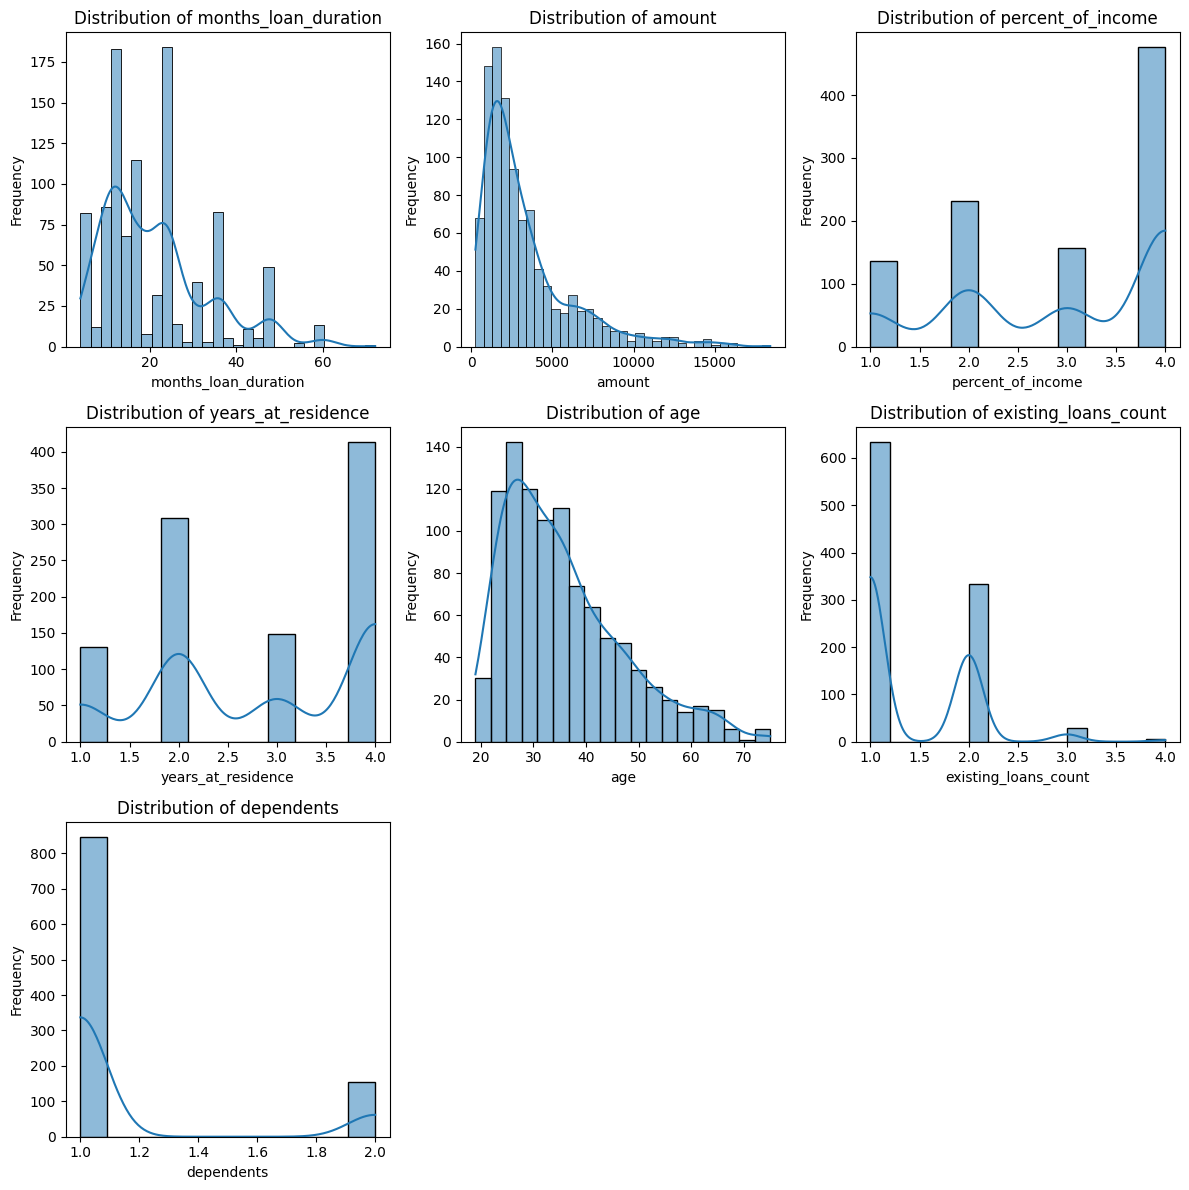

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

def plot_histograms(data, numerical_columns):
    n = len(numerical_columns)
    rows = (n + 2) // 3  # Calculate number of rows for the given number of columns. The "+2" ensures we round up.

    plt.figure(figsize=(12, 4 * rows))  # Adjusted figure size to accommodate multiple subplots

    for i, num_col in enumerate(numerical_columns):
        plt.subplot(rows, 3, i + 1)  # (number of rows, 3 columns, current index)
        sns.histplot(data[num_col], kde=True)
        plt.title(f'Distribution of {num_col}')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')

    plt.tight_layout()  # Adjusts subplot params so that subplots do not overlap
    plt.show()

    # Display space after the plots
    display(HTML("<br>"))  # This inserts a line break after the plots

# Assuming data_org and numeric_columns are defined
plot_histograms(data_org, numeric_columns)

Bar Plot: Useful for categorical variables.

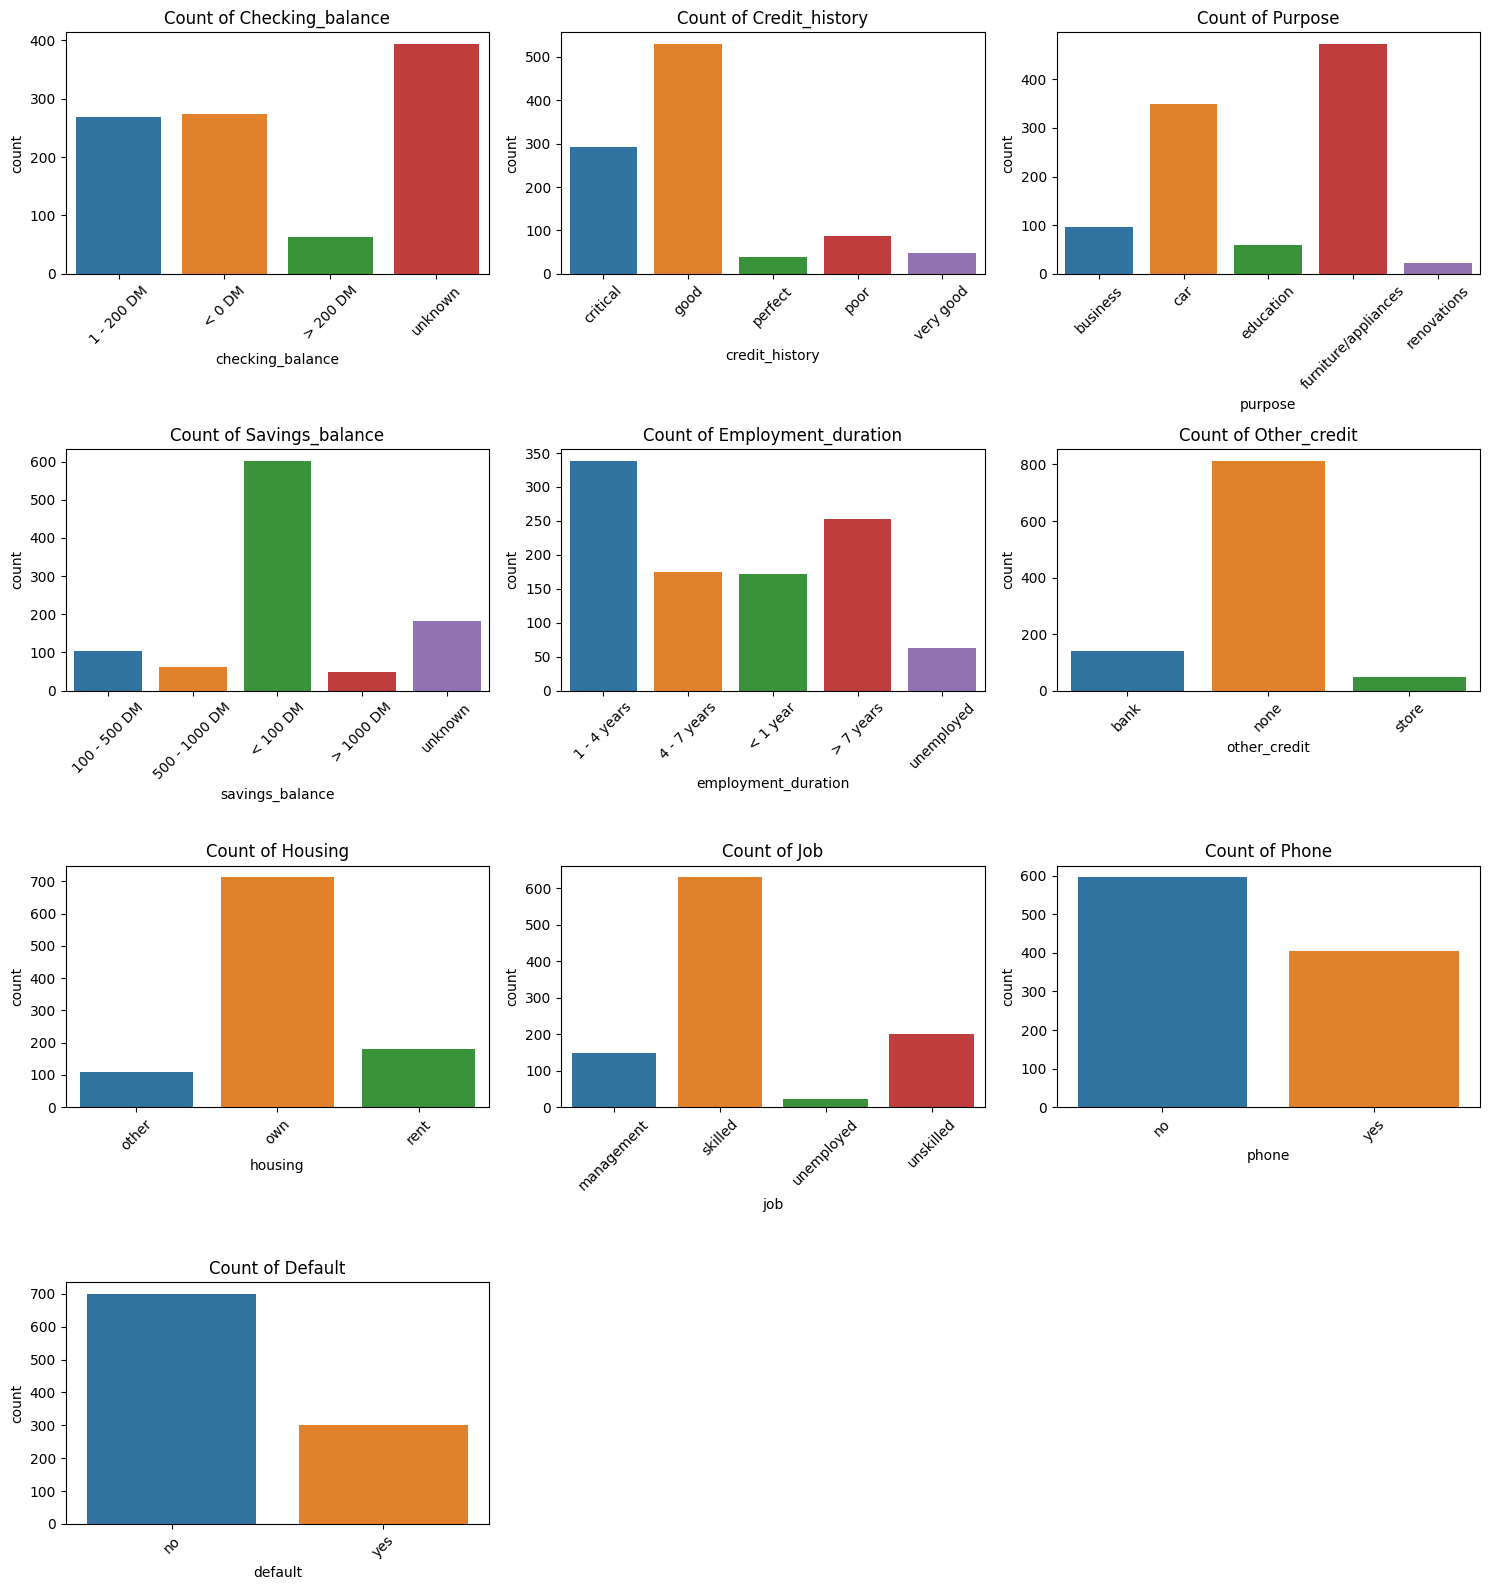

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

def plot_countplots(data, categorical_columns):
    n = len(categorical_columns)
    rows = (n + 2) // 3  # Calculate number of rows for the given number of columns. The "+2" ensures we round up.

    plt.figure(figsize=(15, 4 * rows))  # Adjusted figure size to accommodate multiple subplots

    for i, col in enumerate(categorical_columns):
        plt.subplot(rows, 3, i + 1)  # (number of rows, 3 columns, current index)
        sns.countplot(x=col, data=data, order=sorted(data[col].unique()))  # Order by sorted unique values
        plt.title(f'Count of {col.capitalize()}')
        plt.xticks(rotation=45)  # rotated for better visualization

    plt.tight_layout()  # Adjusts subplot params so that subplots do not overlap
    plt.show()

    # Display space after the plots
    display(HTML("<br>"))  # This inserts a line break after the plots

# Assuming data_org and categorical_columns are defined
plot_countplots(data_org, categorical_columns)


### Bivariate Visualizations:

Box Plot: Useful to see the distribution and outliers for numerical variables.

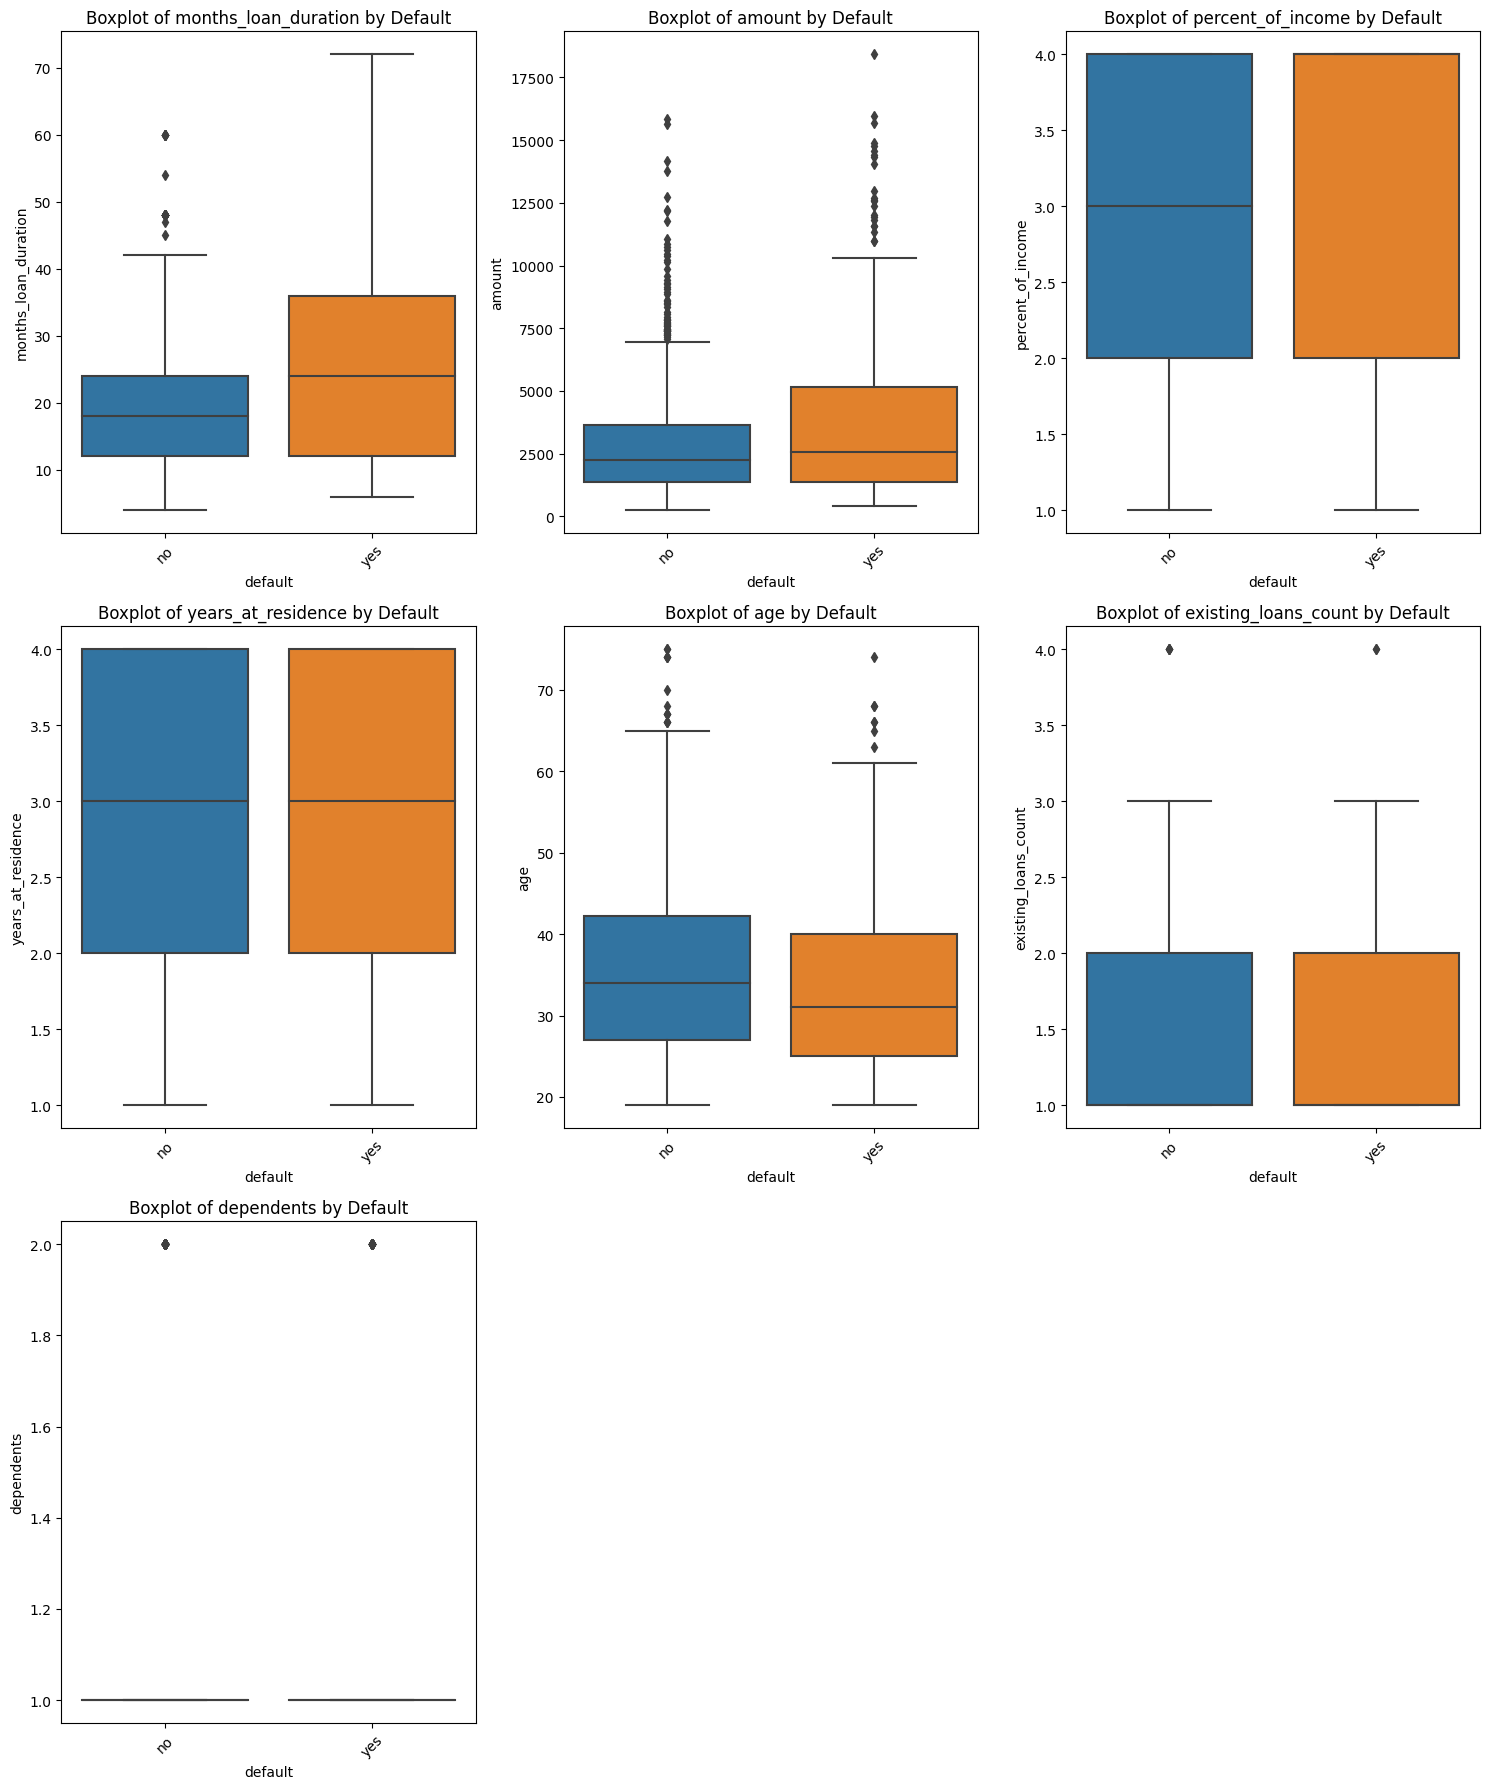

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

def plot_mapped_boxplots(data, numerical_columns, categorical_col):
    n = len(numerical_columns)
    rows = (n + 2) // 3  # Calculate the number of rows. The "+2" ensures we round up.

    plt.figure(figsize=(15, 6 * rows))  # Adjusted figure size for multiple subplots

    for i, num_col in enumerate(numerical_columns):
        plt.subplot(rows, 3, i + 1)  # (number of rows, 3 columns, current index)
        sns.boxplot(x=categorical_col, y=num_col, data=data, order=sorted(data[categorical_col].unique()))
        plt.title(f'Boxplot of {num_col} by {categorical_col.capitalize()}')
        plt.xticks(rotation=45)  # rotated for better visualization

    plt.tight_layout()  # Adjusts subplot params so that subplots do not overlap
    plt.show()

    # Display space after the plots
    display(HTML("<br>"))  # This inserts a line break after the plots

# List of numerical variables to plot

numeric_columns = data_org.select_dtypes(include=[np.number]).columns

# Assuming data_org is defined
plot_mapped_boxplots(data_org, numeric_columns, 'default')

Stacked Bar Plot: Useful for Bivariate relationships between categorical variables.

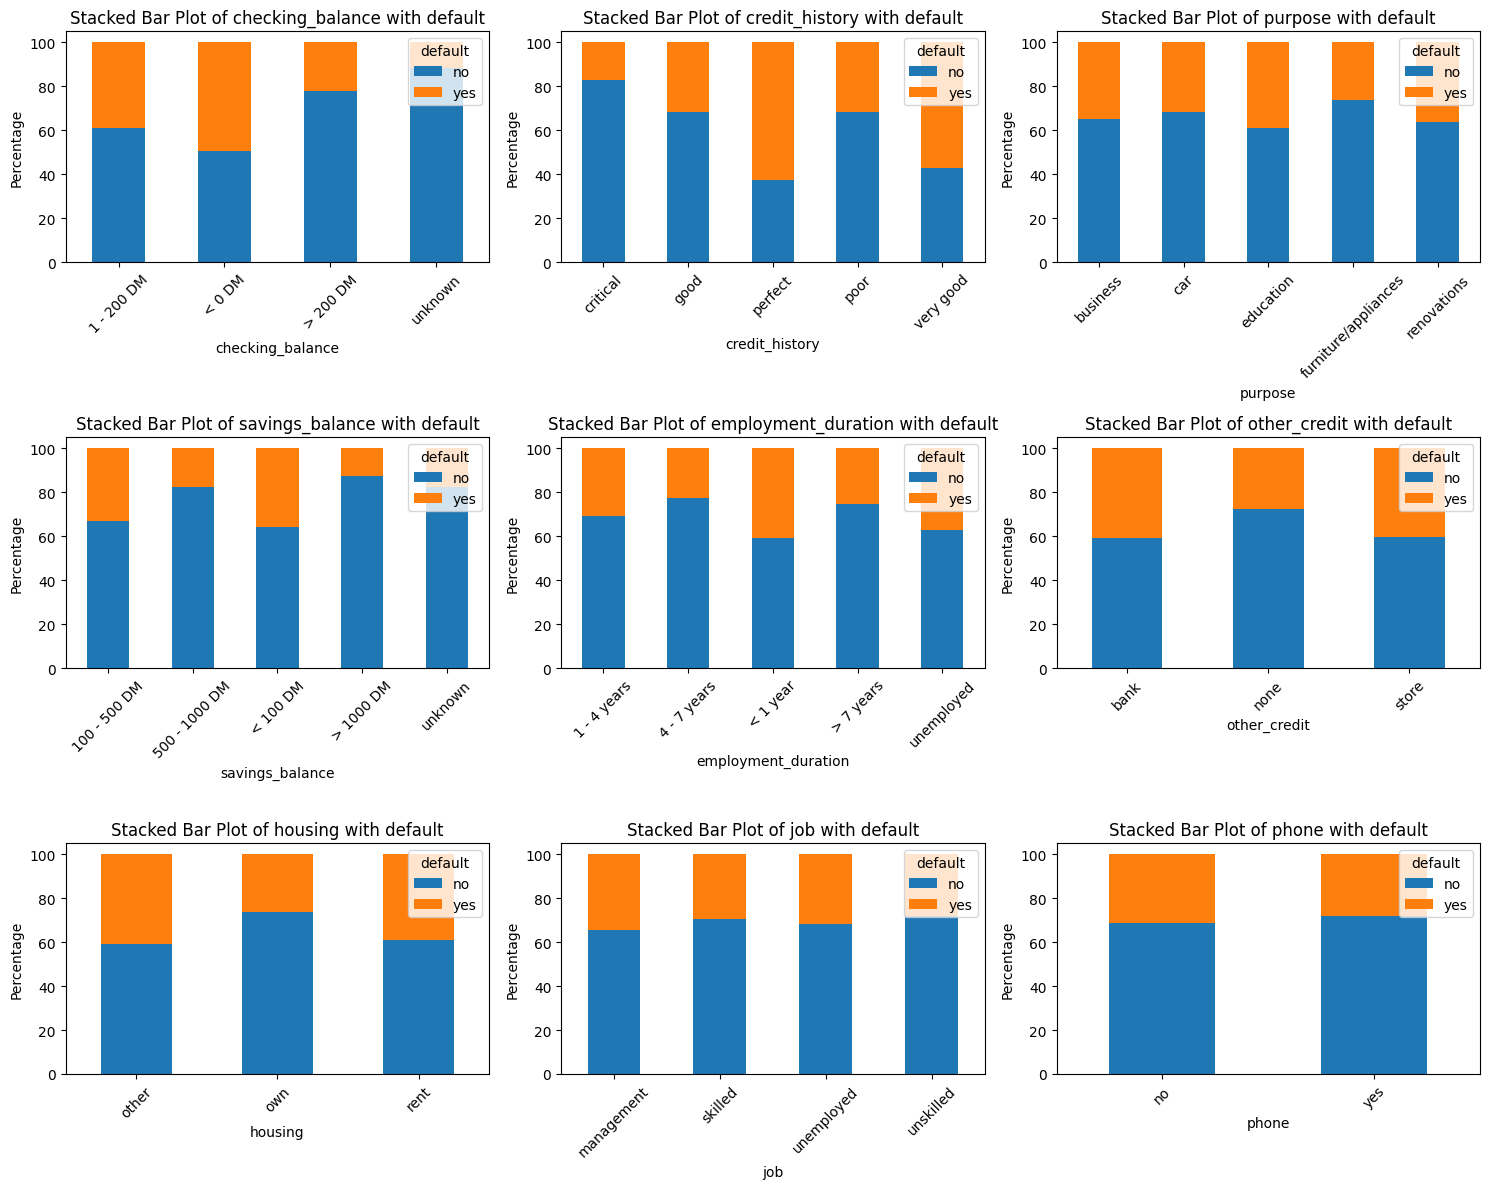

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def grid_stacked_bar_plot(data, categorical_columns, target_col):
    n = len(categorical_columns)
    rows = (n + 2) // 3  # Calculate the number of rows. The "+2" ensures we round up.

    plt.figure(figsize=(15, 4 * rows))  # Adjusted figure size for multiple subplots

    for i, cat_col in enumerate(categorical_columns):
        plt.subplot(rows, 3, i + 1)  # (number of rows, 3 columns, current index)

        cross_tab = pd.crosstab(data[cat_col], data[target_col], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())

        plt.title(f'Stacked Bar Plot of {cat_col} with {target_col}')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.legend(title=target_col, loc='upper right')

    plt.tight_layout()
    plt.show()

categorical_columns = [
    'checking_balance', 'credit_history', 'purpose', 'savings_balance',
    'employment_duration', 'other_credit', 'housing', 'job', 'phone'
]
grid_stacked_bar_plot(data_org, categorical_columns, 'default')


### Multivariate

Pair Plot: Visualize pairwise relationships across multiple variables in a dataset, offering a holistic view of their distributions and correlations.

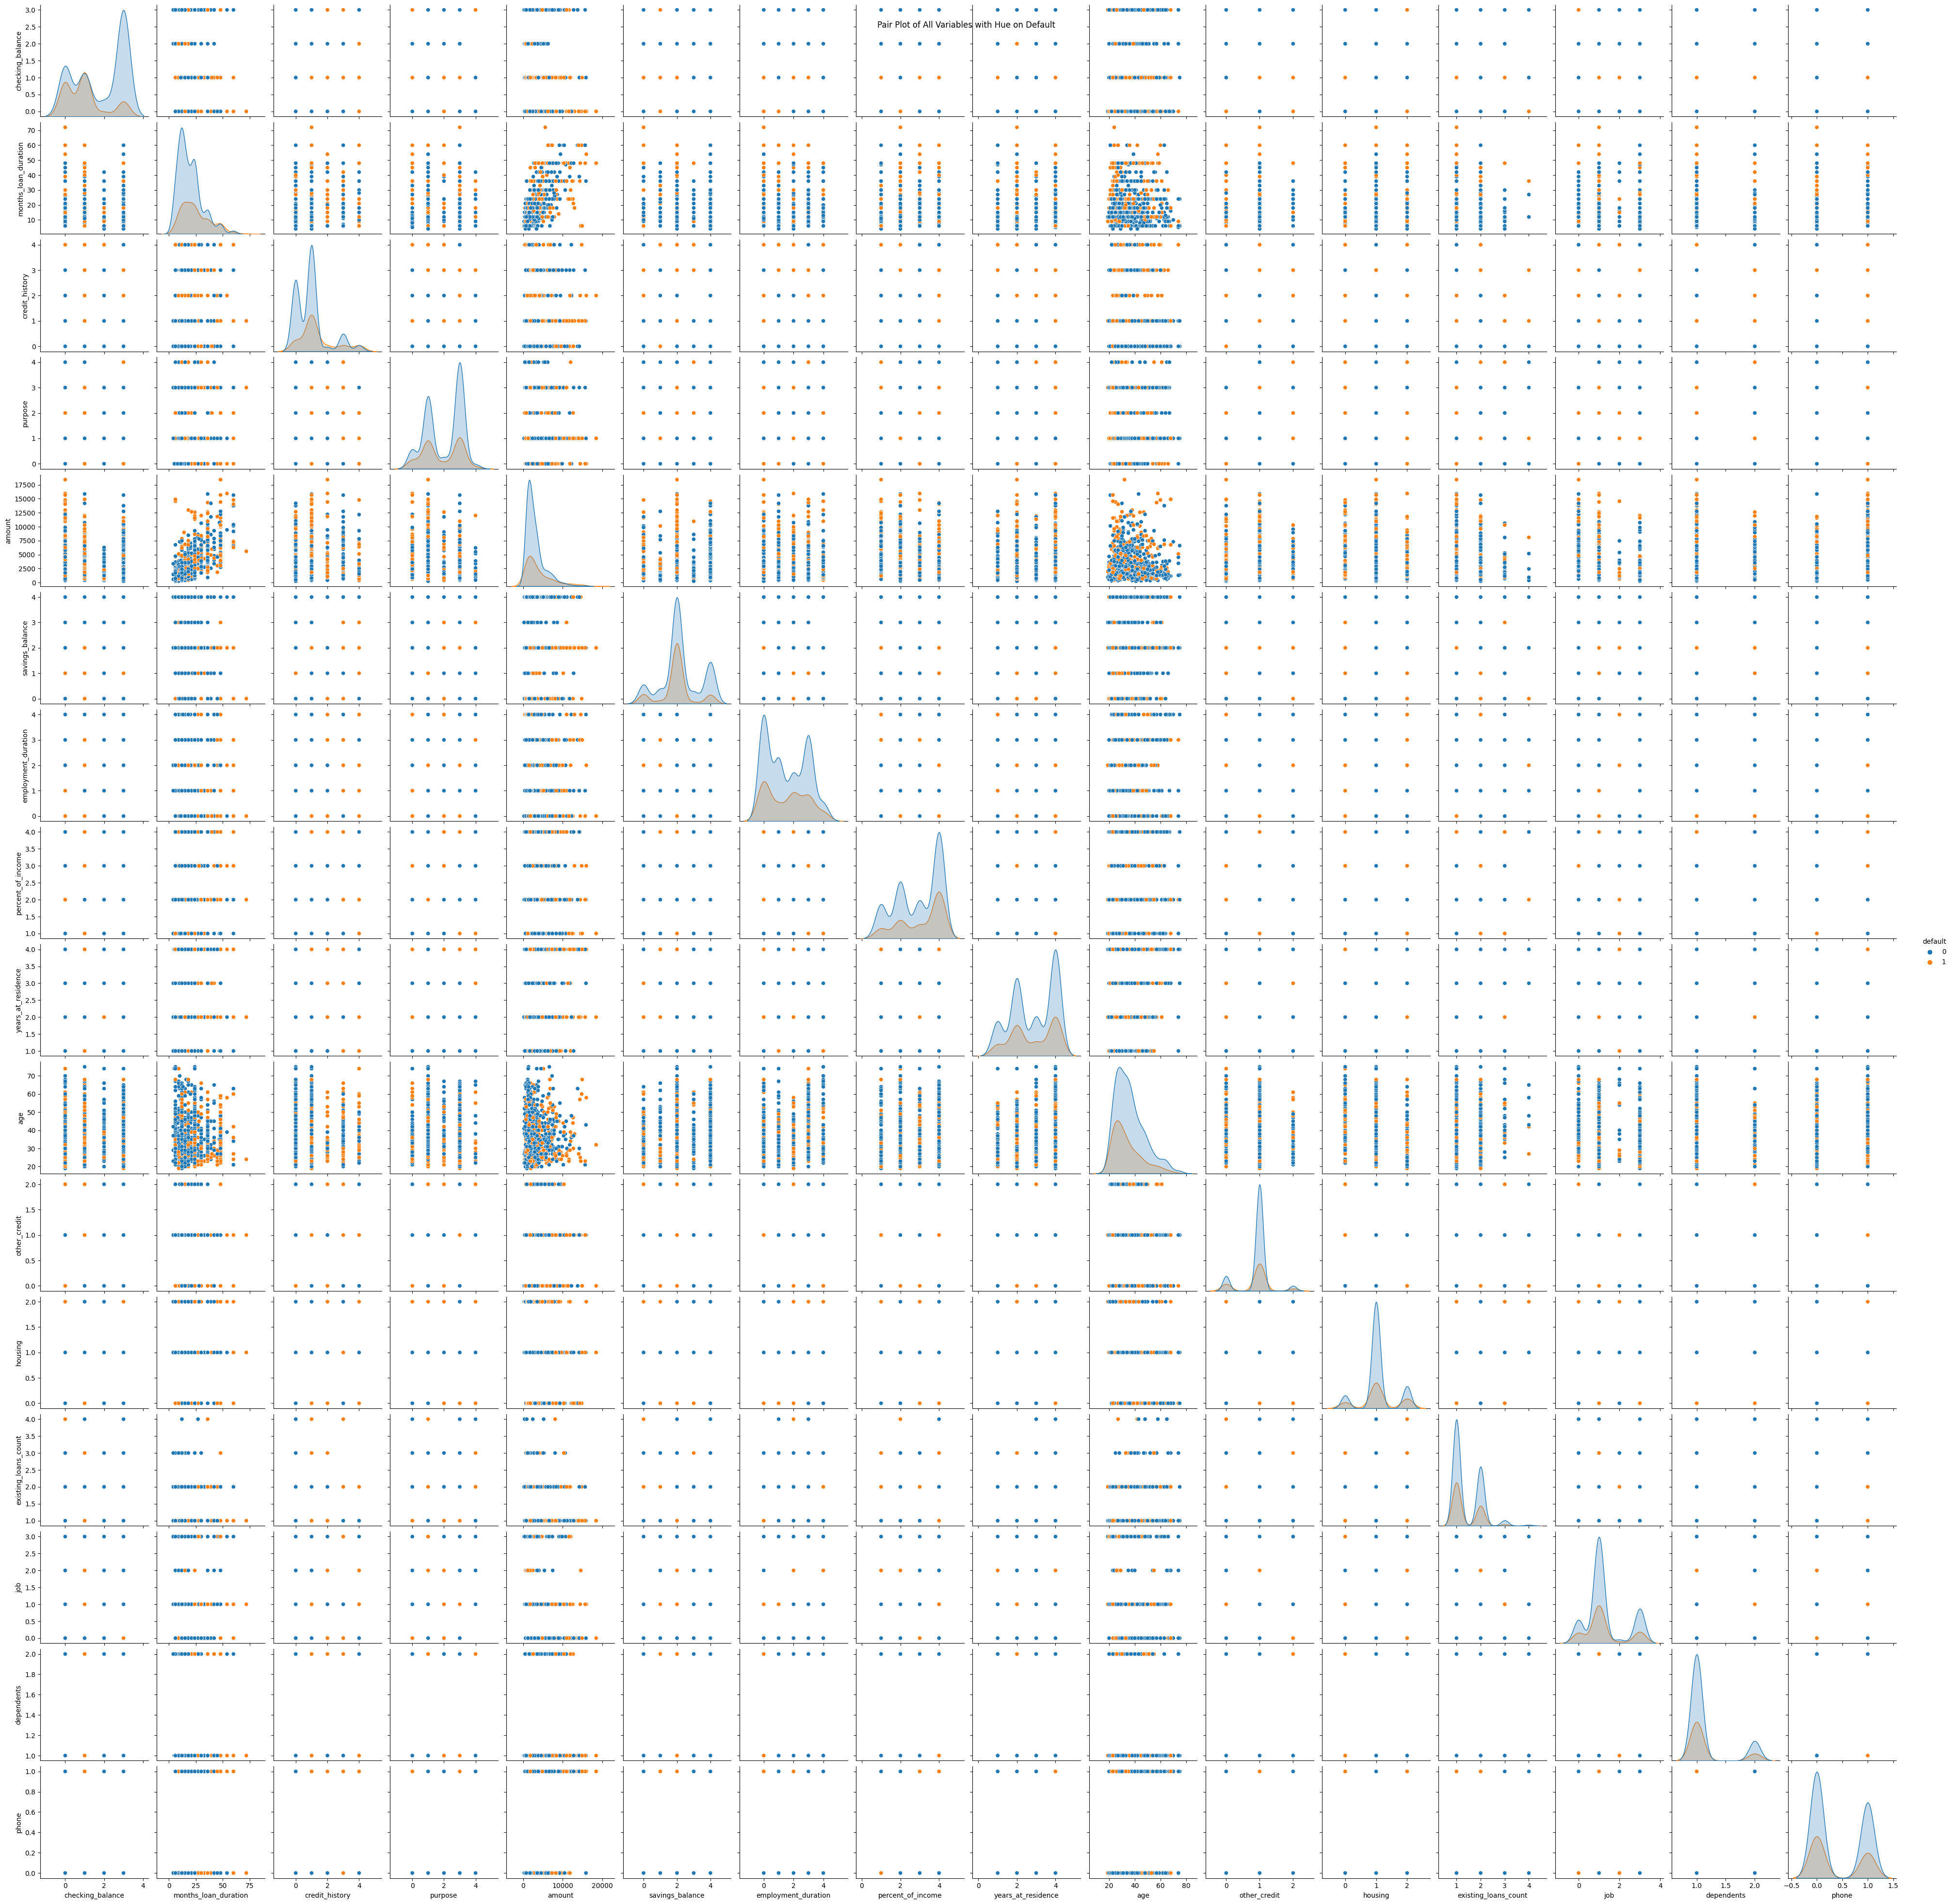

In [ ]:
sns.pairplot(data_labl, hue='default')  # hue colors points based on the 'default' column
plt.suptitle('Pair Plot of All Variables with Hue on Default')
plt.show()

Correlation Matrix: A numerical representation that quantifies the linear relationships between variables, aiding in identifying patterns and multicollinearity in datasets.

In [ ]:
# Correlation matrix
corr_matrix = data_labl.corr()
corr_matrix

checking_balance  months_loan_duration  credit_history  \
checking_balance              1.000000             -0.096005       -0.155113   
months_loan_duration         -0.096005              1.000000        0.148239   
credit_history               -0.155113              0.148239        1.000000   
purpose                       0.035836             -0.141135       -0.108773   
amount                       -0.092638              0.624984        0.109598   
savings_balance               0.097452              0.020843       -0.073245   
employment_duration          -0.030032              0.003824       -0.053245   
percent_of_income             0.029780              0.074749       -0.016986   
years_at_residence            0.008835              0.034067       -0.031805   
age                           0.083636             -0.036136       -0.057085   
other_credit                  0.052184              0.003559       -0.066258   
housing                      -0.012511             -0.157049       -0.015954   
existing_loans_count          0.084513             -0.011284       -0.177467   
job                          -0.029085             -0.215438       -0.009165   
dependents                    0.030417             -0.023834        0.057804   
phone                         0.037208              0.164718       -0.004388   
default                      -0.302406              0.214927        0.193730   

                       purpose    amount  savings_balance  \
checking_balance      0.035836 -0.092638         0.097452   
months_loan_duration -0.141135  0.624984         0.020843   
credit_history       -0.108773  0.109598        -0.073245   
purpose               1.000000 -0.217931         0.000609   
amount               -0.217931  1.000000         0.070127   
savings_balance       0.000609  0.070127         1.000000   
employment_duration  -0.024405  0.038756         0.056865   
percent_of_income     0.103879 -0.271316         0.032940   
years_at_residence   -0.046979  0.028926         0.038741   
age                  -0.097049  0.032716         0.094760   
other_credit          0.067945 -0.020224         0.000726   
housing               0.059268 -0.135632        -0.032711   
existing_loans_count -0.081229  0.020795         0.015568   
job                   0.051159 -0.261139        -0.040662   
dependents           -0.111521  0.017142         0.023693   
phone                -0.145814  0.276995         0.075988   
default              -0.059775  0.154739        -0.103133   

                      employment_duration  percent_of_income  \
checking_balance                -0.030032           0.029780   
months_loan_duration             0.003824           0.074749   
credit_history                  -0.053245          -0.016986   
purpose                         -0.024405           0.103879   
amount                           0.038756          -0.271316   
savings_balance                  0.056865           0.032940   
employment_duration              1.000000           0.074664   
percent_of_income                0.074664           1.000000   
years_at_residence               0.218838           0.049302   
age                              0.289741           0.058266   
other_credit                    -0.052460           0.041423   
housing                         -0.126529          -0.089405   
existing_loans_count             0.085495           0.021669   
job                             -0.142279          -0.078090   
dependents                       0.028019          -0.071207   
phone                            0.110568           0.014413   
default                          0.008932           0.072404   

                      years_at_residence       age  other_credit   housing  \
checking_balance                0.008835  0.083636      0.052184 -0.012511   
months_loan_duration            0.034067 -0.036136      0.003559 -0.157049   
credit_history                 -0.031805 -0.057085     -0.066258 -0.015954   
purpose          

Heat Map: Graphically represent data values using color gradients, enabling quick identification of patterns and correlations across variables.



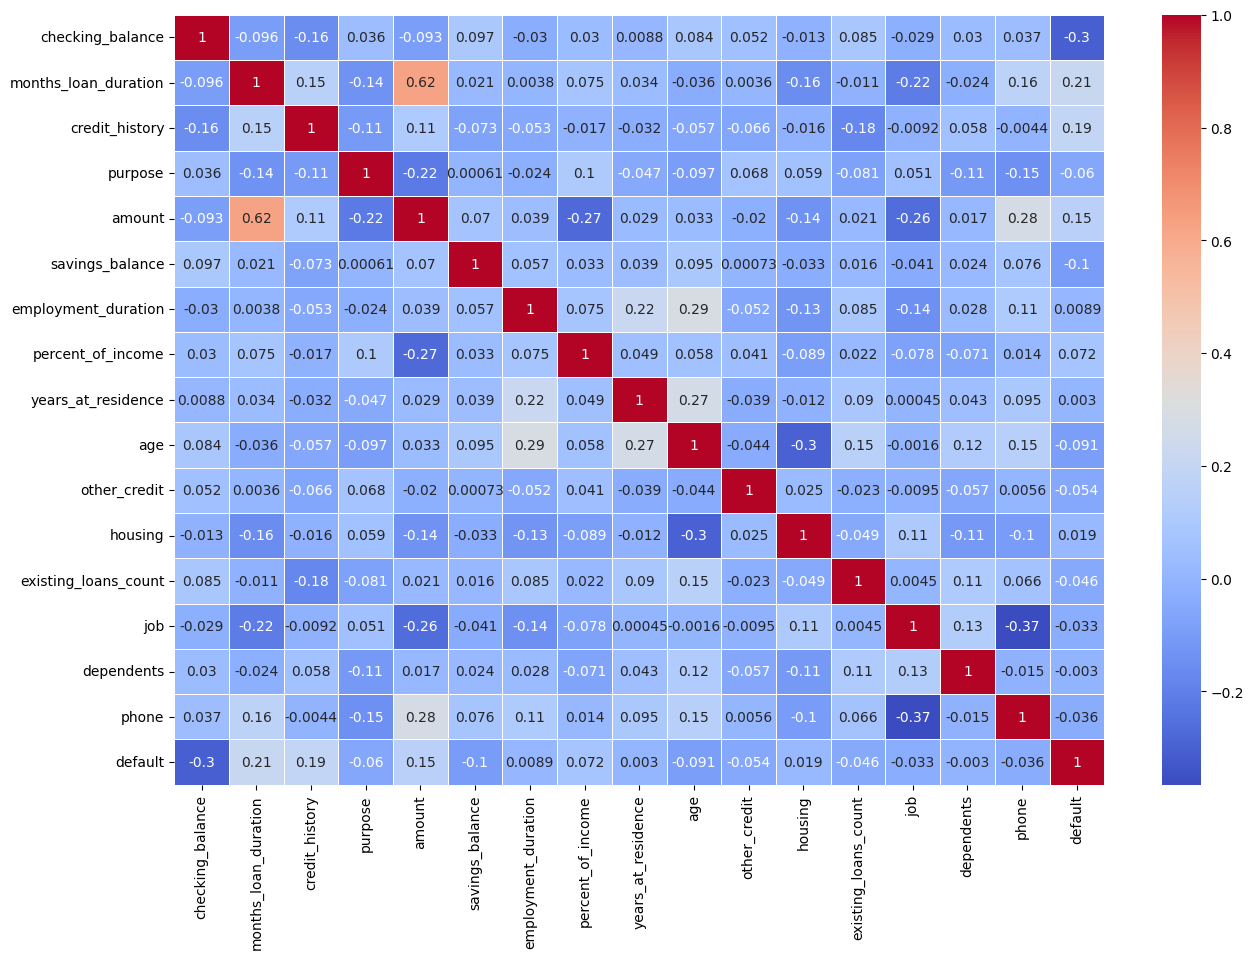

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Display heatmap with annotations and a colormap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Adjust rotation of x-axis and y-axis labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

##  4. Building the model

**Splitting and Scaling Data**

In [ ]:
# Splitting data
X = data_labl.drop('default', axis=1)
y = data_labl['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The following model performance classification function will return the accuracy, recall, precision and F1 score.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

The following function will return the confusion matrix for a model

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

Use Model list to store the details of all the classifiers to be used.

In [ ]:
models = []  # Empty list to store all the models

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("LightGBM", LGBMClassifier(random_state=30, verbose=-1)))
models.append(("CatBoost", CatBoostClassifier(random_state=30, verbose=0)))

Find CV Scores and Training Recall

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score

# Initialize lists to store results
cv_results = []
train_recall_scores = []

# Loop through all models to get the mean cross-validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    cv_results.append(cv_result.mean() * 100)

    # Training performance
    model.fit(X_train, y_train)
    train_recall = recall_score(y_train, model.predict(X_train)) * 100
    train_recall_scores.append(train_recall)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'Cross-Validation Performance (%)': cv_results,
    'Training Recall (%)': train_recall_scores
})

# Set the index to start from 1
results_df.index = range(1, len(results_df) + 1)

# Display the DataFrame
results_df

Model  Cross-Validation Performance (%)  Training Recall (%)
1        Bagging                         39.850823            95.020747
2  Random forest                         36.538066           100.000000
3            GBM                         38.611111            69.709544
4       Adaboost                         36.944444            52.282158
5        Xgboost                         46.085391           100.000000
6       LightGBM                         45.673868           100.000000
7       CatBoost                         36.939300            87.136929

### Confusion Matrix and Classification Metrics of All Classifiers


*************************************


Bagging: 

Train: 
   Accuracy    Recall  Precision        F1
0    0.9825  0.950207   0.991342  0.970339

Test
    Accuracy   Recall  Precision   F1
0      0.76  0.40678   0.648649  0.5




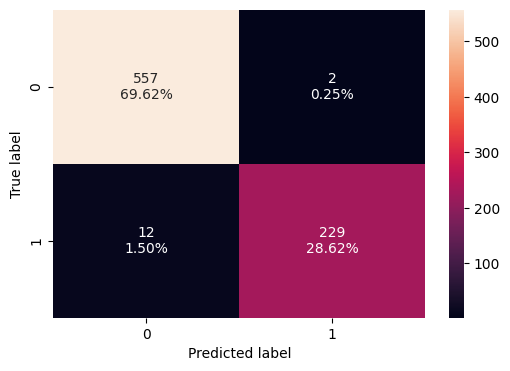


*************************************

Random forest: 

Train: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Test
    Accuracy    Recall  Precision        F1
0     0.795  0.542373   0.695652  0.609524




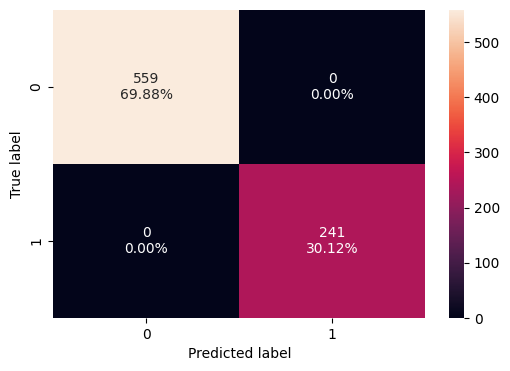


*************************************

GBM: 

Train: 
   Accuracy    Recall  Precision        F1
0   0.88875  0.697095   0.913043  0.790588

Test
    Accuracy    Recall  Precision        F1
0     0.785  0.491525   0.690476  0.574257




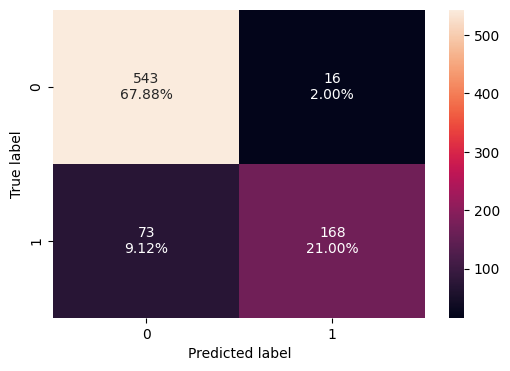


*************************************

Adaboost: 

Train: 
   Accuracy    Recall  Precision       F1
0     0.785  0.522822   0.688525  0.59434

Test
    Accuracy    Recall  Precision    F1
0      0.76  0.440678   0.634146  0.52




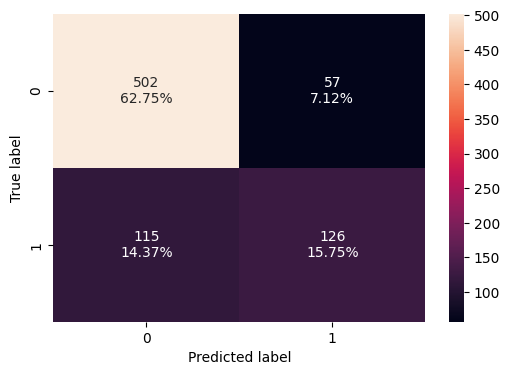


*************************************

Xgboost: 

Train: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Test
    Accuracy    Recall  Precision        F1
0     0.765  0.457627   0.642857  0.534653




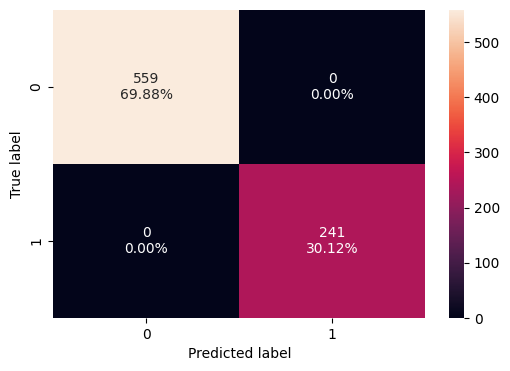


*************************************

LightGBM: 

Train: 
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Test
    Accuracy    Recall  Precision        F1
0     0.795  0.525424   0.704545  0.601942




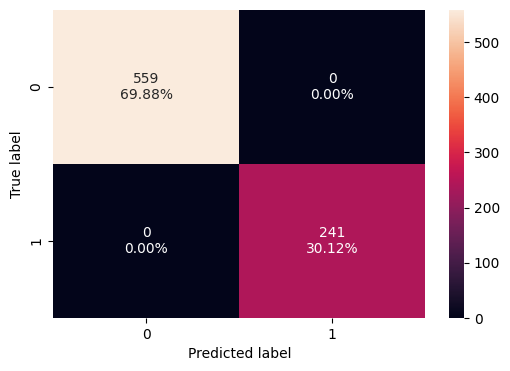


*************************************

CatBoost: 

Train: 
   Accuracy    Recall  Precision        F1
0   0.95875  0.871369   0.990566  0.927152

Test
    Accuracy    Recall  Precision       F1
0      0.77  0.474576   0.651163  0.54902




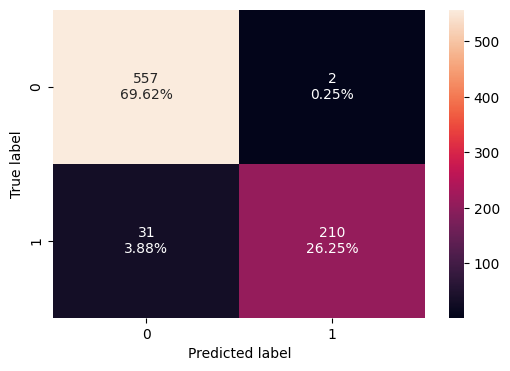


*************************************


In [ ]:
for name, model in models:
  model.fit(X_train, y_train)


print("\n*************************************\n")

for name, model in models:
  predictions = model.predict(X_test)
  print("\n{}: \n{}: \n{}".format(name,"\nTrain",model_performance_classification_sklearn(model, X_train, y_train)))
  print("\nTest\n",model_performance_classification_sklearn(model, X_test, y_test))
  print("\n")
  confusion_matrix_sklearn(model, X_train, y_train)
  print("\n*************************************")


In [ ]:
metrics_data = []

for name, model in models:
    train_metrics = model_performance_classification_sklearn(model, X_train, y_train)
    test_metrics = model_performance_classification_sklearn(model, X_test, y_test)

    metrics_data.append({
        "Model": name,
        "Train Accuracy": train_metrics["Accuracy"].values[0],
        "Train Recall": train_metrics["Recall"].values[0],
        "Train Precision": train_metrics["Precision"].values[0],
        "Train F1": train_metrics["F1"].values[0],
        "Test Accuracy": test_metrics["Accuracy"].values[0],
        "Test Recall": test_metrics["Recall"].values[0],
        "Test Precision": test_metrics["Precision"].values[0],
        "Test F1": test_metrics["F1"].values[0]
    })

# Create a dataframe from the collected metrics
df_metrics = pd.DataFrame(metrics_data)

# Set the index to start from 1
df_metrics.index = range(1, len(df_metrics) + 1)

# Display the DataFrame
df_metrics

Model  Train Accuracy  Train Recall  Train Precision  Train F1  \
1        Bagging         0.98250      0.950207         0.991342  0.970339   
2  Random forest         1.00000      1.000000         1.000000  1.000000   
3            GBM         0.88875      0.697095         0.913043  0.790588   
4       Adaboost         0.78500      0.522822         0.688525  0.594340   
5        Xgboost         1.00000      1.000000         1.000000  1.000000   
6       LightGBM         1.00000      1.000000         1.000000  1.000000   
7       CatBoost         0.95875      0.871369         0.990566  0.927152   

   Test Accuracy  Test Recall  Test Precision   Test F1  
1          0.760     0.406780        0.648649  0.500000  
2          0.795     0.542373        0.695652  0.609524  
3          0.785     0.491525        0.690476  0.574257  
4          0.760     0.440678        0.634146  0.520000  
5          0.765     0.457627        0.642857  0.534653  
6          0.795     0.525424        0.704545  0.601942  
7          0.770     0.474576        0.651163  0.549020

## 5. Hyperparameter Tuning

We will tune all the models using GridSearchCV. We will also compare the performance and time taken by this method - Grid Search

### 1. GBM

Let's tune GBM model using **GridSearch**

We define certain hyperparameters in the grid and GridSearchCV build model using every possible combination of the hyperparameters defined in the grid and it returns the best combination of the hyperparameters. Grid Search is usually computationally expensive.

**Grid Search**

In [ ]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1,1,0.1),
    "max_depth": [1,2,3],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} with CV score={}:".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'learning_rate': 0.8, 'max_depth': 2, 'n_estimators': 100} with CV score=0.5268707482993198:
CPU times: user 2.7 s, sys: 277 ms, total: 2.98 s
Wall time: 1min 32s


In [ ]:
# building model with best parameters

gbm_tuned = GradientBoostingClassifier(
    n_estimators=grid_cv.best_params_['n_estimators'],
    learning_rate=grid_cv.best_params_['learning_rate'],
    max_depth=grid_cv.best_params_['max_depth'],
)

# Fit the model on training data
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2)

In [ ]:
models_tuned = []

In [ ]:
models_tuned.append(("GBM", gbm_tuned))

**Checking model performance**

Training performance:
   Accuracy    Recall  Precision        F1
0   0.96375  0.904564   0.973214  0.937634
*************************************
Test performance:
   Accuracy   Recall  Precision   F1
0      0.76  0.40678   0.648649  0.5
*************************************
Training confusion matrix


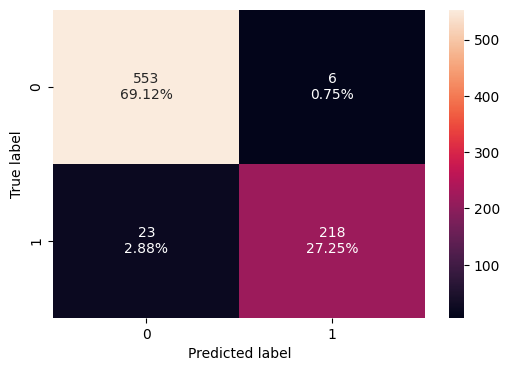

Testing confusion matrix


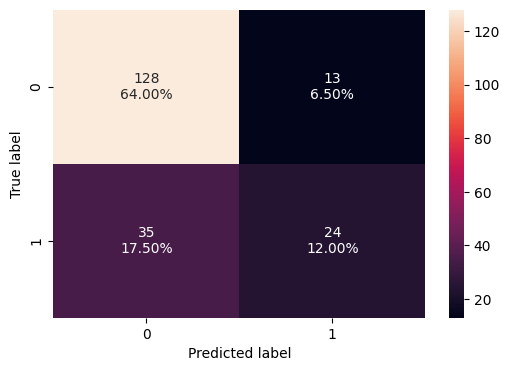

In [ ]:
# Calculating different metrics on train set
GBM_grid_train = model_performance_classification_sklearn(
    gbm_tuned, X_train, y_train
)

GBM_grid_test = model_performance_classification_sklearn(
    gbm_tuned, X_test, y_test
)
print("Training performance:")
print(GBM_grid_train)

print("*************************************")

print("Test performance:")
print(GBM_grid_test)

print("*************************************")

# creating confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(gbm_tuned, X_train, y_train)

# creating confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(gbm_tuned, X_test, y_test)

**Observations**
- On comparing the CV score and the training score, model is slightly overfitting.
- The test recall is still less than 50% i.e. the model is not good at identifying potential customers who would take the offer.

### 2. Adaboost

Let's tune Adaboost model using **GridSearch**

**Grid Search**

In [ ]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 1, 'n_estimators': 30} 
Score: 0.48954081632653057
CPU times: user 2.52 s, sys: 252 ms, total: 2.77 s
Wall time: 1min 42s


In [ ]:
# building model with best parameters
adb_tuned = AdaBoostClassifier(
    n_estimators=grid_cv.best_params_['n_estimators'],
    learning_rate=grid_cv.best_params_['learning_rate'],
    random_state=42,
    base_estimator=grid_cv.best_params_['base_estimator'],
)

# Fit the model on training data
adb_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=42)

In [ ]:
models_tuned.append(("Adaboost", adb_tuned))

**Checking model performance**

Training performance:
   Accuracy    Recall  Precision        F1
0      0.96  0.912863   0.952381  0.932203
*************************************
Test performance:
   Accuracy    Recall  Precision        F1
0      0.68  0.423729   0.454545  0.438596
*************************************
Training confusion matrix


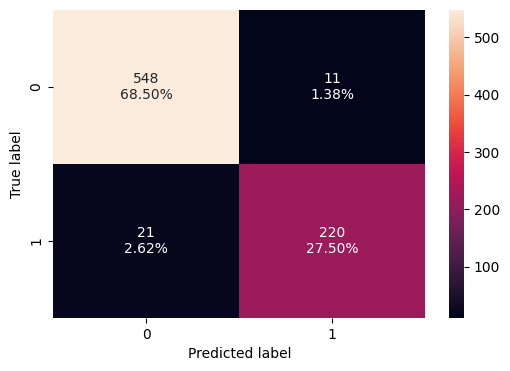

Testing confusion matrix


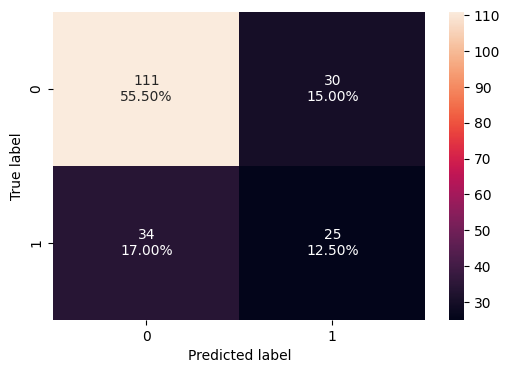

In [ ]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned, X_train, y_train
)

Adaboost_grid_test = model_performance_classification_sklearn(
    adb_tuned, X_test, y_test
)
print("Training performance:")
print(Adaboost_grid_train)

print("*************************************")

print("Test performance:")
print(Adaboost_grid_test)

print("*************************************")

# creating confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(adb_tuned, X_train, y_train)

#Testing confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(adb_tuned, X_test, y_test)

**Observations**
- On comparing the CV score and the training score, model is overfitting.
- The test recall is still less than 50% i.e. the model is not good at identifying potential customers who would take the offer.

### 3. XGBoost

**Grid Search**

In [ ]:
%%time

#defining model
model = XGBClassifier(random_state=42,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,100,50),
            'scale_pos_weight':[2,5],
            'learning_rate':np.arange(0.1, 1, 0.1),
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,4,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 1} with CV score=0.9004251700680271:
CPU times: user 9.66 s, sys: 363 ms, total: 10 s
Wall time: 3min 2s


In [ ]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=42,
    n_estimators=grid_cv.best_params_['n_estimators'],
    scale_pos_weight=grid_cv.best_params_['scale_pos_weight'],
    subsample=grid_cv.best_params_['subsample'],
    learning_rate=grid_cv.best_params_['learning_rate'],
    gamma=grid_cv.best_params_['gamma'],
    eval_metric="logloss",
    reg_lambda=grid_cv.best_params_['reg_lambda'],
    max_depth=grid_cv.best_params_['max_depth'],
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [ ]:
models_tuned.append(("Xgboost", xgb_tuned))

**Checking model performance**

Training performance:
   Accuracy    Recall  Precision        F1
0    0.5275  0.954357    0.38526  0.548926
*************************************
Test performance:
   Accuracy    Recall  Precision        F1
0      0.56  0.966102   0.398601  0.564356
*************************************
Training confusion matrix


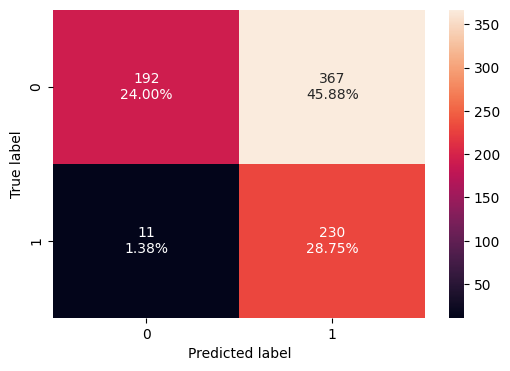

Testing confusion matrix


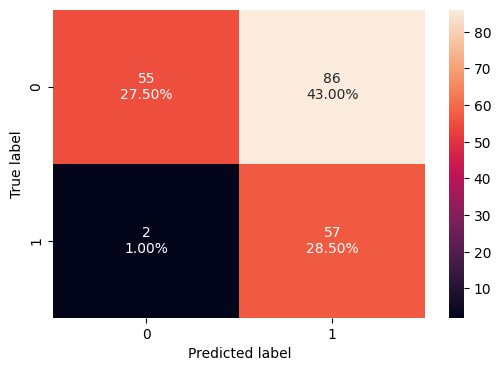

In [ ]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)

xgboost_grid_test = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)

print("Training performance:")
print(xgboost_grid_train)

print("*************************************")

print("Test performance:")
print(xgboost_grid_test)

print("*************************************")

# creating confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

#Testing confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

**Observations**
- The validation recall has increased as compared to the result from cross-validation with default parameters.
- The model has very low precision score (however low precision shouldn't affect us much here)

### 4. Random Forest Classifier

**Grid Search**

In [ ]:
%%time

#defining model
model = RandomForestClassifier(random_state=42)

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(10,110,10),
            'max_depth':np.arange(1,5,1),
            'max_features':np.arange(1,15,1)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
Best parameters are {'max_depth': 4, 'max_features': 12, 'n_estimators': 70} with CV score=0.35272108843537414:
CPU times: user 8.11 s, sys: 654 ms, total: 8.77 s
Wall time: 5min 2s


In [ ]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    random_state=42,
    n_estimators=grid_cv.best_params_['n_estimators'],
    max_depth=grid_cv.best_params_['max_depth'],
    max_features=grid_cv.best_params_['max_features']
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=12, n_estimators=70,
                       random_state=42)

In [ ]:
models_tuned.append(("Random forest", rf_tuned))

**Checking model performance**

Training performance:
   Accuracy    Recall  Precision        F1
0   0.80625  0.443983   0.835938  0.579946
*************************************
Test performance:
   Accuracy    Recall  Precision        F1
0      0.79  0.423729   0.757576  0.543478
*************************************
Training confusion matrix


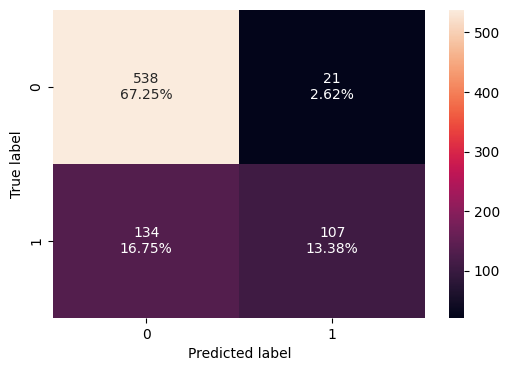

Testing confusion matrix


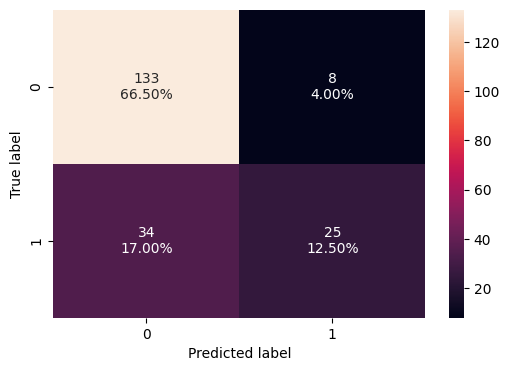

In [ ]:
# Calculating different metrics on train set
rf_grid_train = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)

rf_grid_test = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)

print("Training performance:")
print(rf_grid_train)

print("*************************************")

print("Test performance:")
print(rf_grid_test)

print("*************************************")

#Training confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

#Testing confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### 5. Catboost Classifier

**Grid Search**

In [ ]:
%%time

# Defining model
model = CatBoostClassifier(random_state=42, verbose=0)

# Parameter grid to pass in GridSearchCV
param_grid = {
    'iterations': [500],
    'depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best parameters for CatBoost are {} with CV score={}:" .format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for CatBoost are {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.05} with CV score=0.4896258503401361:
CPU times: user 2.97 s, sys: 346 ms, total: 3.31 s
Wall time: 2min 31s


In [ ]:
# building model with best parameters
cb_tuned = CatBoostClassifier(
    random_state=42,
    depth=grid_cv.best_params_['depth'],
    iterations=grid_cv.best_params_['iterations'],
    l2_leaf_reg=grid_cv.best_params_['l2_leaf_reg'],
    learning_rate=grid_cv.best_params_['learning_rate']
)

# Fit the model on training data
cb_tuned.fit(X_train, y_train)

0:	learn: 0.6710167	total: 1.57ms	remaining: 783ms
1:	learn: 0.6515785	total: 3.41ms	remaining: 850ms
2:	learn: 0.6352910	total: 4.76ms	remaining: 789ms
3:	learn: 0.6200447	total: 6.22ms	remaining: 772ms
4:	learn: 0.6041708	total: 7.82ms	remaining: 774ms
5:	learn: 0.5930211	total: 9.42ms	remaining: 776ms
6:	learn: 0.5857377	total: 10.5ms	remaining: 739ms
7:	learn: 0.5730779	total: 11.7ms	remaining: 717ms
8:	learn: 0.5615026	total: 13.1ms	remaining: 713ms
9:	learn: 0.5526366	total: 14.5ms	remaining: 713ms
10:	learn: 0.5424783	total: 16ms	remaining: 710ms
11:	learn: 0.5350065	total: 17.3ms	remaining: 704ms
12:	learn: 0.5266354	total: 18.7ms	remaining: 702ms
13:	learn: 0.5212156	total: 23ms	remaining: 797ms
14:	learn: 0.5163222	total: 24.5ms	remaining: 791ms
15:	learn: 0.5090755	total: 26ms	remaining: 785ms
16:	learn: 0.5030507	total: 27.4ms	remaining: 778ms
17:	learn: 0.4966360	total: 28.9ms	remaining: 773ms
18:	learn: 0.4900930	total: 30.4ms	remaining: 769ms
19:	learn: 0.4846992	total: 

In [ ]:
models_tuned.append(("CatBoost", cb_tuned))

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
*************************************
Test performance:
   Accuracy    Recall  Precision        F1
0     0.795  0.508475   0.714286  0.594059
*************************************
Training confusion matrix


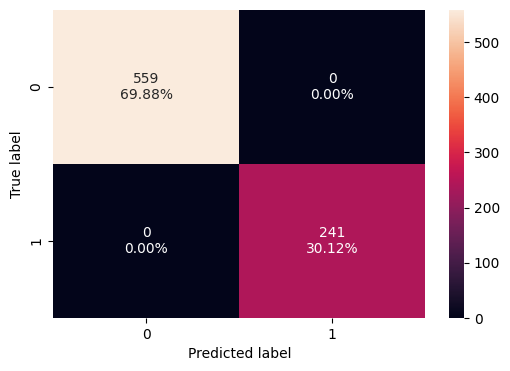

Testing confusion matrix


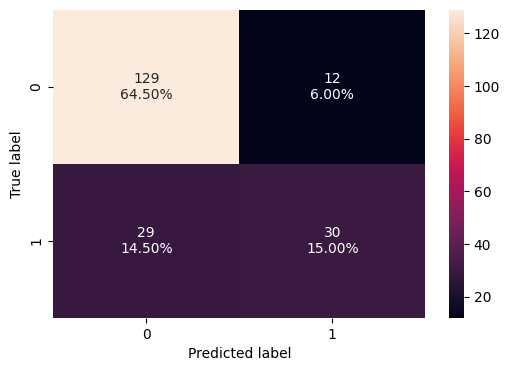

In [ ]:
# Calculating different metrics on train set
cb_grid_train = model_performance_classification_sklearn(
    cb_tuned, X_train, y_train
)

cb_grid_test = model_performance_classification_sklearn(
    cb_tuned, X_test, y_test
)

print("Training performance:")
print(cb_grid_train)

print("*************************************")

print("Test performance:")
print(cb_grid_test)

print("*************************************")

#Training confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(cb_tuned, X_train, y_train)

#Testing confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(cb_tuned, X_test, y_test)

### 6. Bagging Classifier

**Grid Search**

In [ ]:
%%time

# Defining model
model = BaggingClassifier(random_state=42)

# Parameter grid to pass in GridSearchCV
param_grid = {
    'n_estimators': np.arange(50, 150, 50),
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best parameters for Bagging are {} with CV score={}:" .format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Bagging are {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50} with CV score=0.48571428571428565:
CPU times: user 2.13 s, sys: 178 ms, total: 2.3 s
Wall time: 1min 30s


In [ ]:
# building model with best parameters
bg_tuned = BaggingClassifier(
    random_state=42,
    bootstrap=grid_cv.best_params_['bootstrap'],
    bootstrap_features=grid_cv.best_params_['bootstrap_features'],
    max_features=grid_cv.best_params_['max_features'],
    max_samples=grid_cv.best_params_['max_samples'],
    n_estimators=grid_cv.best_params_['n_estimators']

)

# Fit the model on training data
bg_tuned.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, n_estimators=50, random_state=42)

In [ ]:
models_tuned.append(("Bagging", bg_tuned))

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
*************************************
Test performance:
   Accuracy    Recall  Precision        F1
0     0.695  0.440678   0.481481  0.460177
*************************************
Training confusion matrix


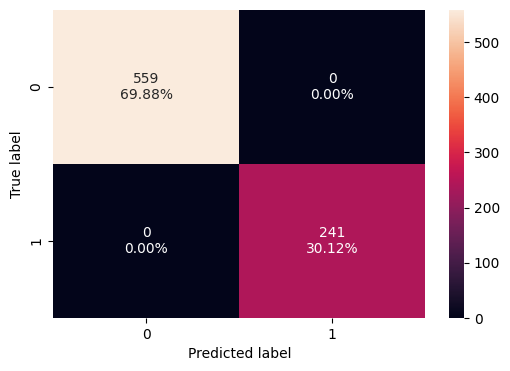

Testing confusion matrix


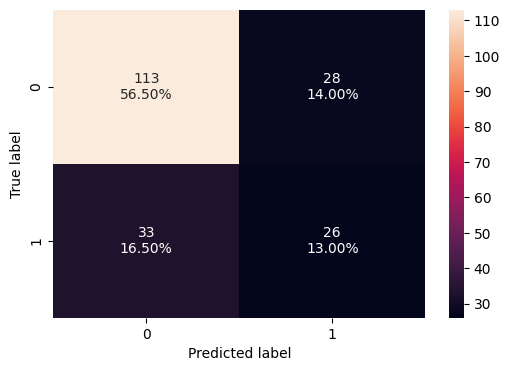

In [ ]:
# Calculating different metrics on train set
bg_grid_train = model_performance_classification_sklearn(
    bg_tuned, X_train, y_train
)

bg_grid_test = model_performance_classification_sklearn(
    bg_tuned, X_test, y_test
)

print("Training performance:")
print(bg_grid_train)

print("*************************************")

print("Test performance:")
print(bg_grid_test)

print("*************************************")

#Training confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(bg_tuned, X_train, y_train)

#Testing confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(bg_tuned, X_test, y_test)

### 7. Light GBM Classifier

**Grid Search**

In [ ]:
%%time

from lightgbm import LGBMClassifier

# Defining model
model = LGBMClassifier(random_state=42)

# Parameter grid to pass in GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'boosting_type': ['gbdt', 'dart'],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=0)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best parameters for LightGBM are {} with CV score={}:" .format(grid_cv.best_params_, grid_cv.best_score_))


[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301250 -> initscore=-0.841353
[LightGBM] [Info] Start training from score -0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# building model with best parameters
lgbm_tuned = LGBMClassifier(
    random_state=42,
    boosting_type=grid_cv.best_params_['boosting_type'],
    learning_rate=grid_cv.best_params_['learning_rate'],
    max_depth=grid_cv.best_params_['max_depth'],
    n_estimators=grid_cv.best_params_['n_estimators'],
    num_leaves=grid_cv.best_params_['num_leaves'],
    reg_alpha=grid_cv.best_params_['reg_alpha'],
    reg_lambda=grid_cv.best_params_['reg_lambda']
    )

# Fit the model on training data
lgbm_tuned.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301250 -> initscore=-0.841353
[LightGBM] [Info] Start training from score -0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(n_estimators=150, random_state=42, reg_alpha=0.1, reg_lambda=0.5)

In [ ]:
models_tuned.append(("LightGBM", lgbm_tuned))

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
*************************************
Test performance:
   Accuracy    Recall  Precision        F1
0      0.77  0.491525   0.644444  0.557692
*************************************
Training confusion matrix


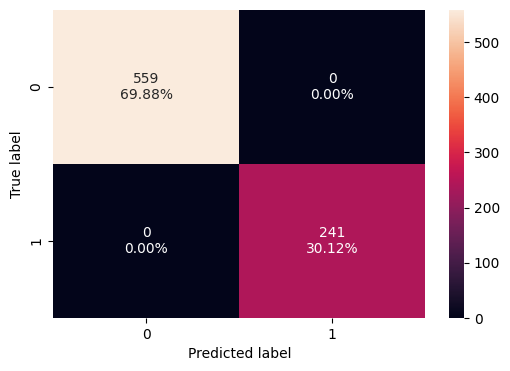

Testing confusion matrix


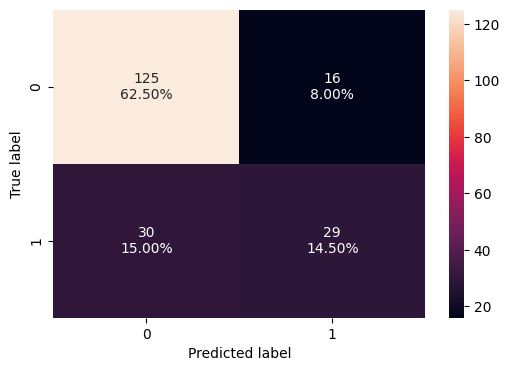

In [ ]:
# Calculating different metrics on train set
lgbm_grid_train = model_performance_classification_sklearn(
    lgbm_tuned, X_train, y_train
)

lgbm_grid_test = model_performance_classification_sklearn(
    lgbm_tuned, X_test, y_test
)

print("Training performance:")
print(lgbm_grid_train)

print("*************************************")

print("Test performance:")
print(lgbm_grid_test)

print("*************************************")

#Training confusion matrix
print("Training confusion matrix")
confusion_matrix_sklearn(lgbm_tuned, X_train, y_train)

#Testing confusion matrix
print("Testing confusion matrix")
confusion_matrix_sklearn(lgbm_tuned, X_test, y_test)

## 6. Comparison of Metrics

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        GBM_grid_train.T,
        Adaboost_grid_train.T,
        xgboost_grid_train.T,
        rf_grid_train.T,
    cb_grid_train.T,
    bg_grid_train.T,
    lgbm_grid_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    "GBM Tuned with Grid search",
    "AdaBoost Tuned with Grid search",
    "Xgboost Tuned with Grid search",
    "RandomForest Tuned with Grid search",
    "CatBoost Tuned with Grid search",
    "Bagging Classifier Tuned with Grid search",
    "LGBM Classifier Tuned with Grid search"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


GBM Tuned with Grid search  AdaBoost Tuned with Grid search  \
Accuracy                     0.963750                         0.960000   
Recall                       0.904564                         0.912863   
Precision                    0.973214                         0.952381   
F1                           0.937634                         0.932203   

           Xgboost Tuned with Grid search  \
Accuracy                         0.527500   
Recall                           0.954357   
Precision                        0.385260   
F1                               0.548926   

           RandomForest Tuned with Grid search  \
Accuracy                              0.806250   
Recall                                0.443983   
Precision                             0.835938   
F1                                    0.579946   

           CatBoost Tuned with Grid search  \
Accuracy                               1.0   
Recall                                 1.0   
Precision                              1.0   
F1                                     1.0   

           Bagging Classifier Tuned with Grid search  \
Accuracy                                         1.0   
Recall                                           1.0   
Precision                                        1.0   
F1                                               1.0   

           LGBM Classifier Tuned with Grid search  
Accuracy                                      1.0  
Recall                                        1.0  
Precision                                     1.0  
F1                                            1.0

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        GBM_grid_test.T,
        Adaboost_grid_test.T,
        xgboost_grid_test.T,
        rf_grid_test.T,
        cb_grid_test.T,
    bg_grid_test.T,
    lgbm_grid_test.T],
    axis=1,
)
models_test_comp_df.columns = [
    "GBM Tuned with Grid search",
    "AdaBoost Tuned with Grid search",
    "Xgboost Tuned with Grid search",
    "RandomForest Tuned with Grid search",
    "CatBoost Tuned with Grid search",
    "Bagging Classifier Tuned with Grid search",
    "LGBM Classifier Tuned with Grid search"
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


GBM Tuned with Grid search  AdaBoost Tuned with Grid search  \
Accuracy                     0.760000                         0.680000   
Recall                       0.406780                         0.423729   
Precision                    0.648649                         0.454545   
F1                           0.500000                         0.438596   

           Xgboost Tuned with Grid search  \
Accuracy                         0.560000   
Recall                           0.966102   
Precision                        0.398601   
F1                               0.564356   

           RandomForest Tuned with Grid search  \
Accuracy                              0.790000   
Recall                                0.423729   
Precision                             0.757576   
F1                                    0.543478   

           CatBoost Tuned with Grid search  \
Accuracy                          0.795000   
Recall                            0.508475   
Precision                         0.714286   
F1                                0.594059   

           Bagging Classifier Tuned with Grid search  \
Accuracy                                    0.695000   
Recall                                      0.440678   
Precision                                   0.481481   
F1                                          0.460177   

           LGBM Classifier Tuned with Grid search  
Accuracy                                 0.770000  
Recall                                   0.491525  
Precision                                0.644444  
F1                                       0.557692

In [ ]:
# Convert the list into a DataFrame
df_models_tuned = pd.DataFrame(models_tuned, columns=["Model Name", "Model"])

# Set the index to start from 1
df_models_tuned.index = range(1, len(df_models_tuned) + 1)

# Display the DataFrame
df_models_tuned

Model Name                                              Model
1            GBM  ([DecisionTreeRegressor(criterion='friedman_ms...
2       Adaboost  (DecisionTreeClassifier(max_depth=3, random_st...
3        Xgboost  XGBClassifier(base_score=None, booster=None, c...
4  Random forest  (DecisionTreeClassifier(max_depth=4, max_featu...
5       CatBoost  <catboost.core.CatBoostClassifier object at 0x...
6        Bagging  (DecisionTreeClassifier(random_state=195292617...
7       LightGBM  LGBMClassifier(n_estimators=150, random_state=...

In [ ]:
# Metrics without hyperparameter tuning
metrics_data = []

for name, model in models:
    train_metrics = model_performance_classification_sklearn(model, X_train, y_train)
    test_metrics = model_performance_classification_sklearn(model, X_test, y_test)

    metrics_data.append({
        "Model": name,
        "Train Recall (Before Tuning)": train_metrics["Recall"].values[0],
        "Test Recall (Before Tuning)": test_metrics["Recall"].values[0]
    })

# Metrics with hyperparameter tuning
metrics_data_tuned = []

for name, model in models_tuned:
    train_metrics_tuned = model_performance_classification_sklearn(model, X_train, y_train)
    test_metrics_tuned = model_performance_classification_sklearn(model, X_test, y_test)

    metrics_data_tuned.append({
        "Model": name,
        "Train Recall (After Tuning)": train_metrics_tuned["Recall"].values[0],
        "Test Recall (After Tuning)": test_metrics_tuned["Recall"].values[0]
    })

# Convert to DataFrames
df_before_tuning = pd.DataFrame(metrics_data)
df_after_tuning = pd.DataFrame(metrics_data_tuned)

# Merge the two DataFrames on the "Model" column
df_combined = pd.merge(df_before_tuning, df_after_tuning, on="Model")

# Set the index to start from 1
df_combined.index = range(1, len(df_combined) + 1)

# Display the combined DataFrame
df_combined


Model  Train Recall (Before Tuning)  Test Recall (Before Tuning)  \
1        Bagging                      0.950207                     0.406780   
2  Random forest                      1.000000                     0.542373   
3            GBM                      0.697095                     0.491525   
4       Adaboost                      0.522822                     0.440678   
5        Xgboost                      1.000000                     0.457627   
6       LightGBM                      1.000000                     0.525424   
7       CatBoost                      0.871369                     0.474576   

   Train Recall (After Tuning)  Test Recall (After Tuning)  
1                     1.000000                    0.440678  
2                     0.443983                    0.423729  
3                     0.904564                    0.406780  
4                     0.912863                    0.423729  
5                     0.954357                    0.966102  
6                     1.000000                    0.491525  
7                     1.000000                    0.508475

In [ ]:
!pip install nbconvert

In [94]:
!jupyter nbconvert --to html /content/Final_Project_German_Bank_Loan.ipynb

[NbConvertApp] Converting notebook /content/Final_Project_German_Bank_Loan.ipynb to html
[NbConvertApp] Writing 5104544 bytes to /content/Final_Project_German_Bank_Loan.html
